In [1]:
# Initialize the random number generator
using Random
using LinearAlgebra
using Printf
rng = MersenneTwister(2016);

In [2]:
function pretty_print(A)
    m = size(A,1)
    n = size(A,2)
    for i=1:m
        for j=1:n
            @printf "%12.3e" A[i,j]
        end
        @printf "\n"
    end
end    

pretty_print (generic function with 1 method)

In [3]:
# Size of matrix
n = 3
X = rand(rng, n, n)
Λ = diagm(Float32[i for i=1:n])
A = X * Λ / X

3×3 Array{Float64,2}:
 4.30615  -10.9092   6.57564
 1.44662   -5.89854  4.80889
 1.76282   -9.21215  7.5924

In [4]:
rng = MersenneTwister(16);
Qk = rand(rng, n, n)

for k=1:40
    Qk = A * Qk
    Qk, Rk = qr(Qk)
    if k%10 == 0 || k==1
        println("\nIteration ",k)
        pretty_print(Qk' * A * Qk)
    end
end


Iteration 1
   6.270e+00  -5.469e+00  -1.748e+01
   1.567e-01   1.823e+00  -1.132e+00
   9.756e-01  -1.245e+00  -2.093e+00

Iteration 10
   2.993e+00  -1.242e+00  -1.914e+01
  -5.651e-03   2.007e+00  -2.125e+00
   7.727e-06   2.126e-05   9.999e-01

Iteration 20
   3.000e+00  -1.237e+00  -1.913e+01
  -9.966e-05   2.000e+00  -2.232e+00
   1.317e-10   2.982e-08   1.000e+00

Iteration 30
   3.000e+00  -1.237e+00  -1.913e+01
  -1.729e-06   2.000e+00  -2.234e+00
   2.942e-15   2.927e-11   1.000e+00

Iteration 40
   3.000e+00  -1.237e+00  -1.913e+01
  -2.998e-08   2.000e+00  -2.234e+00
  -1.804e-15   2.753e-14   1.000e+00


In [5]:
n = 8; rng = MersenneTwister(16);
X = rand(rng, n, n); Λ = diagm(Float32[i for i=1:n]); 
A = X * Λ / X
niter = 40
Qk = rand(rng, n, n); ev = zeros(niter,n)
for k=1:niter
    Qk = A * Qk
    Qk, Rk = qr(Qk)
    ev[k,:] = diag(Qk' * A * Qk)
end

In [6]:
include("../load_plot_pkg.jl")

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-3404705462663891140\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-8180002266061545583\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-3404705462663891140\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

plotToPDF (generic function with 1 method)

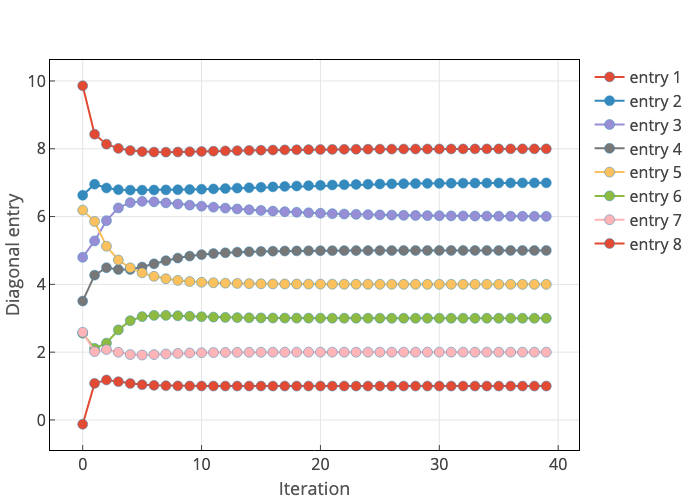

In [7]:
t = Array{PlotlyJS.AbstractTrace,1}()
for i=1:n
     push!(t,scatter(y=ev[:,i],name=string("entry ",i),mode="markers+lines"))
end
l = Layout(height=400,width=500,xaxis_title="Iteration",yaxis_title="Diagonal entry")
p = plot(t,l)
display(p)
output = false
if output
    PlotlyJS.savefig(p,"schur_iteration.pdf")
end